- 1차원(vector) 데이터 : 점(scalar)으로 분리
- 2차원(matrix) 데이터 : 선(line)으로 분리
- 3차원(tensor) 데이터 : 면(plane)으로 분리
- 4차원(tensor) 데이터 : 공간으로 분리
- 면 이상의 차원은 초평면(hyperplane)

### p73 선형 회귀 모델
- 데이터를 선형 함수로 모델링
- 최소제곱법 : 평균제곱오차를 최소화하는 파라미터를 찾는다.
  - 파라미터를 줄이고 키우고를 반복한다(예시0
  - 오차를 파라미터로 미분한 값만큼 조절한다(경사하강법)
  - 정규방정식으로 찾기(데이터가 많아지면 메모리 부족때문에 쓰기 어려움)
- 평균제곱오차 :  오차(예측과 정답의 차이)를 제곱 > 모든 샘플들의 오차를 평균


In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import matplotlib.pylab as plt

In [3]:
#키와 몸무게, 몸무게로부터 키를 예측해보자
몸무게 = [30,60,70,90]
몸무게 = np.array(몸무게).reshape((-1,1))
키 = [120,160,170,190]
키 = np.array(키).reshape((-1,1))
몸무게_test = [65,80] #이 두사람의 키는 어떻게 될까?
몸무게_test = np.array(몸무게_test).reshape((-1,1))

In [4]:
#76 모델선택
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X=몸무게, y=키) # w*x+b, w와 b를 조절하는것

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [5]:
몸무게_test, lr.predict(몸무게_test)

(array([[65],
        [80]]), array([[162.93333333],
        [180.53333333]]))

In [6]:
lr.score(몸무게,키 ) #결정계수 max 1

0.9928205128205129

In [7]:
#계수 w와 절편 b Y = wx +b = 1.17*x + 86.6
lr.coef_, lr.intercept_

(array([[1.17333333]]), array([86.66666667]))

In [8]:
몸무게 *lr.coef_ +lr.intercept_

array([[121.86666667],
       [157.06666667],
       [168.8       ],
       [192.26666667]])

## LinearRegression으로 내일의 종가 예측
- 입력(X : 하루 전 데이터), 출력(Y : 다음 날의 종가)
- 데이터 총 m = 10, 학습용 8, 테스트 2 
- 정규화는 생략


In [9]:
url = '코스피200 _ 다음 금융.html'
tables = pd.read_html(url, index_col=0)
len(tables)
df = tables[1]
df.head()


,종가,전일비,등락률,거래량,거래대금,개인(억),외국인(억),기관(억)
일자,,,,,,,,
19.07.02,276.98,▼0.29,-0.10%,22434,819799,345,67,-391
19.07.01,277.27,▼0.23,-0.08%,74357,3446049,-214,1286,365
19.06.28,277.50,▼0.25,-0.09%,67598,2879563,-1802,3011,-1189
19.06.27,277.75,▲2.22,+0.81%,66303,3357666,-4165,1837,2415
19.06.26,275.53,▲0.25,+0.09%,58818,2636531,-712,157,557


In [10]:
#전일비와 등락률을 수치데이터로 변환
df['전일비']= df['전일비'].replace('▼','-',regex=True)
df['전일비']= df['전일비'].replace('▲','+',regex=True)
df['등락률']= df['등락률'].replace('%','',regex=True)

df.head()

,종가,전일비,등락률,거래량,거래대금,개인(억),외국인(억),기관(억)
일자,,,,,,,,
19.07.02,276.98,-0.29,-0.10,22434,819799,345,67,-391
19.07.01,277.27,-0.23,-0.08,74357,3446049,-214,1286,365
19.06.28,277.50,-0.25,-0.09,67598,2879563,-1802,3011,-1189
19.06.27,277.75,+2.22,+0.81,66303,3357666,-4165,1837,2415
19.06.26,275.53,+0.25,+0.09,58818,2636531,-712,157,557


In [11]:
df['전일비']= df['전일비'].astype(np.float)
df['등락률']= df['등락률'].astype(np.float)
#정규화 [0,1] 사이로
minimum = np.min(df,axis=0)
maximum = np.max(df,axis=0)
df_norm = (df-minimum)/ (maximum-minimum)

In [12]:
# X 와 y를 분리
X = df_norm.iloc[1:] #오늘 데이터 제외
y = df_norm.iloc[:-1,0] #가장 오래된 데이터와 종가 외의 컬럼 제외
y.shape

(9,)

In [13]:
#Train /Test 용 분리
from sklearn.model_selection import train_test_split
offset = 2
X_train = X[offset:]#예전
X_test = X[:offset]#최근
y_train = y[offset:]#예전
y_test = y[:offset]#최근

In [14]:
#train 으로 Linier Regression 모델 fit
from sklearn.linear_model import LinearRegression, Ridge,Lasso
lr = Lasso().fit(X_train, y_train)

In [15]:
# score 측정, LR -2만점, Ridge -14점
lr.score(X_train, y_train), lr.score(X_test, y_test)


(0.0, -44.16028052125722)

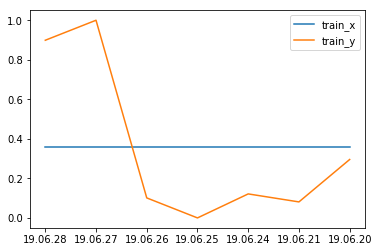

In [16]:
# 예측을그래프로 시각화
plt.plot(lr.predict(X_train), label='train_x')
plt.plot(y_train, label = 'train_y')

plt.legend()

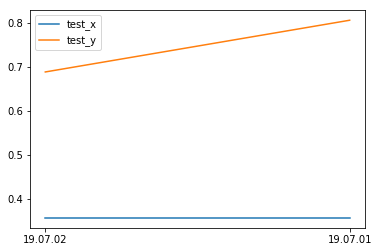

In [17]:

plt.plot(lr.predict(X_test), label='test_x')
plt.plot(y_test, label = 'test_y')

plt.legend()

In [18]:
lr.predict(X_test), lr.coef_

(array([0.35685367, 0.35685367]),
 array([ 0.,  0.,  0.,  0.,  0., -0.,  0.,  0.]))

### 78 릿지(ridge) 모델 : w를 가능한한 작게 만드는 LinierRegression 
 - W 를 줄인다는 것은 y 를 예측하는 데 가능핳한 모든 특성을 반영해라 규제한다는 것
 - Y = w1 *x1 + w2*x2 ......+ wi*xi _b
 

환율

데이터 정제(refinement)

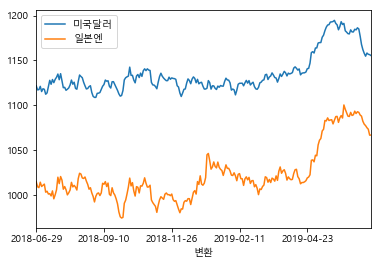

In [72]:
df = pd.read_csv('japan_20190702.csv', encoding='cp949', index_col=0, header=1)
df_1 = pd.read_csv('8.8.1.1 주요국통화의 대원화 환.csv', encoding='cp949', index_col=0, header=3)
df_1.columns = ['미국달러', '일본엔']
df_2 = df_1.dropna()

df_2 = df_2.replace(",","", regex=True)
df_2 = df_2.astype(np.float)


df_2.plot()

In [73]:
window_weak = 4
window_day = window_weak *5 #일
predict_day = 5
window_day

20

X, Y개수
- 데이터가 30개 있으면? 20개로부터 5일 예측하므로 (20_5) = 1샘플, 총 5샘플
- 현재 데이터 248개 샘플, 총 224쌍의 X,Y 를 만들어야 합니다. 
- X[224, 2*20], y[224,2 * 5]

In [80]:
len(df_2), window_day+predict_day, len(df_2) - (window_day+ predict_day) -1

(248, 25, 222)

In [82]:
offset = window_day+ predict_day -1
offset, len(df_2)-offset

(24, 224)

In [92]:
before = df_2.iloc[:-predict_day] #최근데이터 5개 빼고
later = df_2.iloc[window_day:]#과거 데이터 20개 뺴고
before.shape, later.shape

((243, 2), (228, 2))

In [91]:
y

,미국달러,일본엔
변환,,
2018-07-27,1119.6,1006.52
2018-07-30,1120.0,1009.46
2018-07-31,1116.7,1005.95
2018-08-01,1117.9,1000.22
2018-08-02,1119.3,1002.51
2018-08-03,1122.6,1005.60
2018-08-06,1128.1,1014.16
2018-08-07,1123.5,1009.07
2018-08-08,1125.7,1010.82


In [93]:
m = len(df_2) - (predict_day +window_day -1)
m

224

In [100]:
x_list = []
y_list = []
for i in range(m) : 
    x = df_2.iloc[i:i+window_day] #20일간의데이터 
    y = df_2.iloc[i+window_day:i+window_day+predict_day] #그다음 5일간의 데이터
    x_list.append(x.values)
    y_list.append(y.values)

In [102]:
x_list


[array([[1121.7 , 1014.79],
        [1117.2 , 1009.26],
        [1117.4 , 1008.26],
        [1121.1 , 1014.34],
        [1115.3 , 1009.55],
        [1118.4 , 1010.85],
        [1117.8 , 1012.22],
        [1112.3 , 1003.2 ],
        [1113.8 , 1004.28],
        [1120.8 , 1001.16],
        [1127.8 , 1001.55],
        [1123.4 ,  999.07],
        [1128.7 , 1004.63],
        [1125.2 ,  995.84],
        [1128.9 , 1000.31],
        [1131.2 , 1005.91],
        [1134.8 , 1019.91],
        [1128.5 , 1012.79],
        [1135.2 , 1020.63],
        [1127.5 , 1016.73]]), array([[1117.2 , 1009.26],
        [1117.4 , 1008.26],
        [1121.1 , 1014.34],
        [1115.3 , 1009.55],
        [1118.4 , 1010.85],
        [1117.8 , 1012.22],
        [1112.3 , 1003.2 ],
        [1113.8 , 1004.28],
        [1120.8 , 1001.16],
        [1127.8 , 1001.55],
        [1123.4 ,  999.07],
        [1128.7 , 1004.63],
        [1125.2 ,  995.84],
        [1128.9 , 1000.31],
        [1131.2 , 1005.91],
        [1134.8 , 1

In [106]:
X = np.array(x_list)
y = np.array(y_list)

In [107]:
X.shape, y.shape #(m-instance, day, 특징수(달러, 엔화))

((224, 20, 2), (224, 5, 2))

In [110]:
X = np.reshape(X, [m,-1])
y = np.reshape(y, [m,-1])  #(달러, 엔화, 달러, 엔화.......)

In [114]:
y.shape

(224, 10)

In [115]:
#train/ test 분리
offset = 30 #테스트셋
X_train = X[offset:]
X_test = X[:offset]
y_train = y[offset:]
y_test = y[:offset]


In [117]:
X_train.shape

(194, 40)

In [118]:
from sklearn.linear_model import LinearRegression, Ridge
lr = Ridge().fit(X_train, y_train)

In [134]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.9205409191491469, -0.6542108232125314)

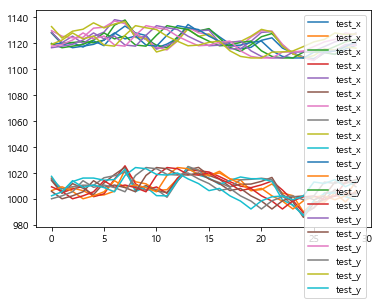

In [133]:
# 예측을그래프로 시각화
plt.plot(lr.predict(X_test), label='test_x')
plt.plot(y_test, label = 'test_y')

plt.legend()

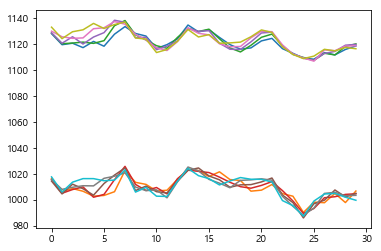

In [128]:
plt.plot(lr.predict(X_test), label='test_x')


In [143]:
#미래의 5일 환율 예측을 그래프로 나타내기
최근20일데이터 = df_2.iloc[-window_day:].values.reshape([1,-1])

미래의5일예측 = lr.predict(최근20일데이터)
미래의5일예측 = np.reshape(미래의5일예측, [predict_day,2])# 다시 3차원으로 
미래의5일예측.shape

(5, 2)

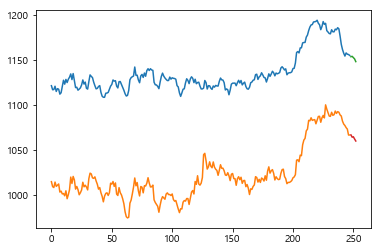

In [152]:
usa = df_2.iloc[:,0].values
japan = df_2.iloc[:,1].values
x_num = np.arange(len(usa))
x1_num = np.arange(len(usa),len(usa)+len(미래의5일예측))
plt.plot(x_num, usa)
plt.plot(x_num, japan)
plt.plot(x1_num, 미래의5일예측[:,0])
plt.plot(x1_num, 미래의5일예측[:,1])

In [150]:
x1_num.shape

(5,)